In [1]:
import pandas as Ht_De_Ptn_Pd
Ht_De_Ptn_Pre = Ht_De_Ptn_Pd.read_csv("pre_proc_heart_disease_dataset2.csv")
Ht_De_Ptn_Pre.shape

(299, 16)

In [2]:
import warnings as Ht_De_Ptn_Pre_wrngs
Ht_De_Ptn_Pre_wrngs.filterwarnings("ignore")

In [3]:
# Splitting dataset @ Training - 60%, Validation - 20% and Testing - 20%

In [4]:
Ht_De_Ptn_Pre_X = Ht_De_Ptn_Pre.drop('num',axis=1)
Ht_De_Ptn_Pre_Y = Ht_De_Ptn_Pre['num']

In [5]:
from sklearn.model_selection import train_test_split as Ht_De_Ptn_Splt
Ht_De_Ptn_Xtr, Ht_De_Ptn_Xts, Ht_De_Ptn_Ytr, Ht_De_Ptn_Yts = Ht_De_Ptn_Splt(Ht_De_Ptn_Pre_X, Ht_De_Ptn_Pre_Y, test_size=0.40, random_state= 42)
print("Heart Disease Data Count - Training:", Ht_De_Ptn_Xtr.shape)

Heart Disease Data Count - Training: (179, 15)


In [6]:
## Testing and Validation Heart Disease Dataset = 40% (20-20) ##
Ht_De_Ptn_Xvl, Ht_De_Ptn_Xts, Ht_De_Ptn_Yvl, Ht_De_Ptn_Yts = Ht_De_Ptn_Splt(Ht_De_Ptn_Xts, Ht_De_Ptn_Yts, test_size= 0.5, random_state= 42)
print("Heart Disease Data Count - Testing:", Ht_De_Ptn_Xts.shape)
print("Heart Disease Data Count - Validating:", Ht_De_Ptn_Xvl.shape)

Heart Disease Data Count - Testing: (60, 15)
Heart Disease Data Count - Validating: (60, 15)


In [7]:
# Implementing SVM Classifier

In [8]:
from sklearn.metrics import classification_report as Ht_De_Ptn_Cfrt
from sklearn.metrics import confusion_matrix as Ht_De_Ptn_Cfmx
from sklearn.metrics import ConfusionMatrixDisplay as Ht_De_Ptn_Cfmxdy
from sklearn.model_selection import GridSearchCV as Ht_De_Ptn_Gdscv
import time as Ht_De_Ptn_tme

In [9]:
from sklearn.svm import SVC as Ht_De_Ptn_SuVeCr

Ht_De_Ptn_SVChp = {  'C': [0.1, 0.3, 0.5],
                    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                    'gamma': ['scale', 'auto']}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_SuVeCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, Ht_De_Ptn_SVChp, cv=2, verbose=1)
Ht_De_Ptn_SuVeCrmd.fit(Ht_De_Ptn_Xtr.sample(100, random_state=42), Ht_De_Ptn_Ytr.sample(100, random_state=40))

print( Ht_De_Ptn_SuVeCrmd.best_params_)
print("The GSV score of SVM model: ", Ht_De_Ptn_SuVeCrmd.best_score_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
The GSV score of SVM model:  0.5700000000000001


In [10]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd1 = Ht_De_Ptn_SuVeCr(**Ht_De_Ptn_SuVeCrmd.best_params_)
Ht_De_Ptn_SuVeCrmd1.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.006145954132080078


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        33
           1       0.00      0.00      0.00        27

    accuracy                           0.55        60
   macro avg       0.28      0.50      0.35        60
weighted avg       0.30      0.55      0.39        60

Time to validate: 0.005042552947998047


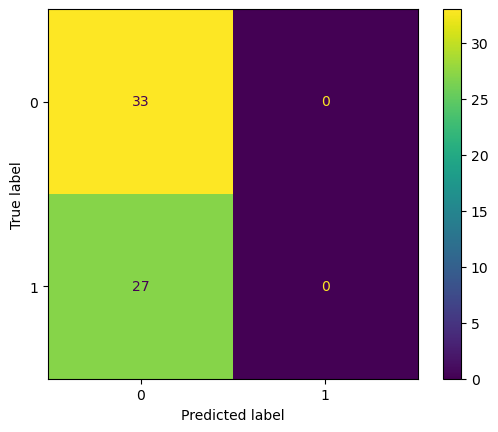

In [11]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd2 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        32
           1       0.00      0.00      0.00        28

    accuracy                           0.53        60
   macro avg       0.27      0.50      0.35        60
weighted avg       0.28      0.53      0.37        60

Time to test: 0.01201486587524414


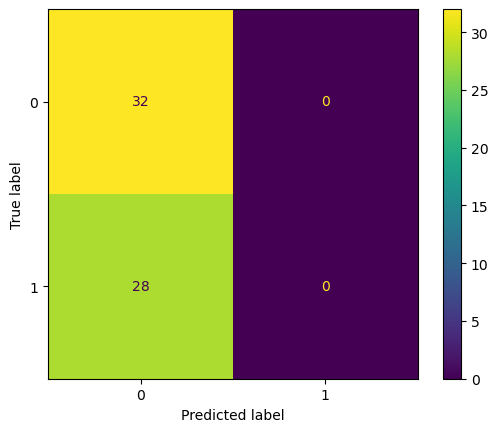

In [12]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd3 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [13]:
# Implementing RF Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier as Ht_De_Ptn_RmFtCr

Ht_De_Ptn_RFChp = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'max_features': ['auto', 'sqrt', 'log2']}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_RmFtCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, Ht_De_Ptn_RFChp, cv=2, verbose=1)
Ht_De_Ptn_SuVeCrmd.fit(Ht_De_Ptn_Xtr.sample(100, random_state=42), Ht_De_Ptn_Ytr.sample(100, random_state=40))

print( Ht_De_Ptn_SuVeCrmd.best_params_)
print("The GSV score of RF model: ", Ht_De_Ptn_SuVeCrmd.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
The GSV score of RF model:  0.5900000000000001


In [15]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd1 = Ht_De_Ptn_RmFtCr(**Ht_De_Ptn_SuVeCrmd.best_params_)
Ht_De_Ptn_SuVeCrmd1.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.23227667808532715


              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.80      0.74      0.77        27

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60

Time to validate: 0.005993366241455078


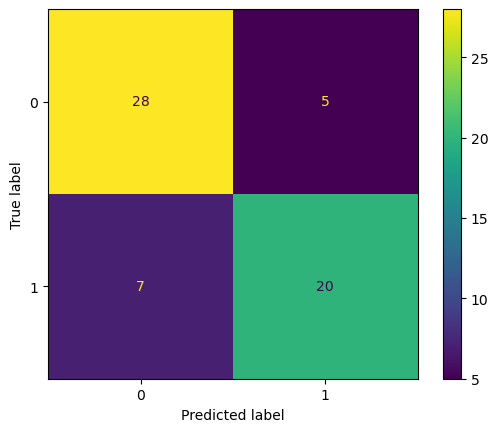

In [16]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd2 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        32
           1       0.96      0.82      0.88        28

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60

Time to test: 0.020639657974243164


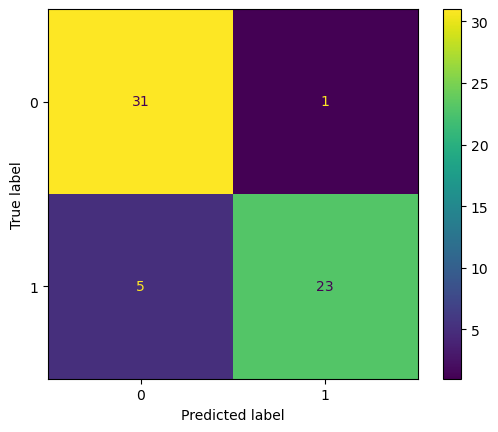

In [17]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd3 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [18]:
# Implementing MLP Classifier

In [19]:
from sklearn.neural_network import MLPClassifier as Ht_De_Ptn_MLPCr

Ht_De_Ptn_MLPhp = {
                'activation': ['relu', 'tanh', 'logistic'],
                'solver': ['sgd', 'adam'],
                'alpha': [0.0001, 0.001, 0.01],
                'learning_rate': ['constant', 'adaptive'],
                'max_iter': [100, 200, 300]}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_MLPCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, Ht_De_Ptn_MLPhp, cv=2, verbose=1)
Ht_De_Ptn_SuVeCrmd.fit(Ht_De_Ptn_Xtr.sample(100, random_state=42), Ht_De_Ptn_Ytr.sample(100, random_state=40))

print( Ht_De_Ptn_SuVeCrmd.best_params_)
print("The GSV score of MLP classifier: ", Ht_De_Ptn_SuVeCrmd.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
{'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'sgd'}
The GSV score of MLP classifier:  0.59


In [20]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd1 = Ht_De_Ptn_MLPCr(**Ht_De_Ptn_SuVeCrmd.best_params_)
Ht_De_Ptn_SuVeCrmd1.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.1280841827392578


              precision    recall  f1-score   support

           0       0.69      0.88      0.77        33
           1       0.78      0.52      0.62        27

    accuracy                           0.72        60
   macro avg       0.73      0.70      0.70        60
weighted avg       0.73      0.72      0.71        60

Time to validate: 0.008003950119018555


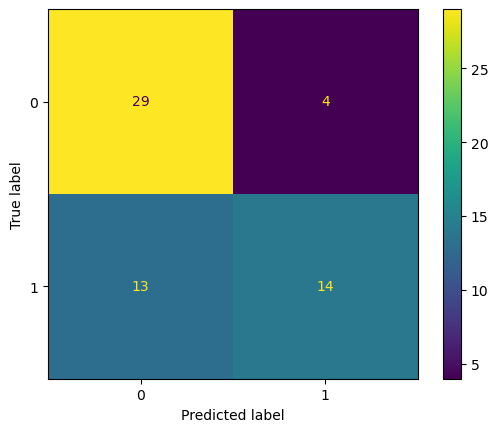

In [21]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd2 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.76      0.68      0.72        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60

Time to test: 0.005504131317138672


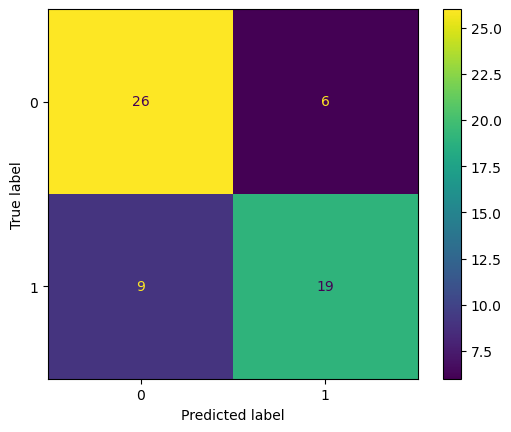

In [22]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd3 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [23]:
# Implementing DT Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier as Ht_De_Ptn_DnTeCr

Ht_De_Ptn_DThp = {'criterion': ['gini', 'entropy'],
                'max_depth': [10, 20, 30, 40],
                'min_samples_split': [3, 5, 7], 
                'min_samples_leaf': [1, 2, 4]}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_DnTeCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, Ht_De_Ptn_DThp, cv=2, verbose=1)
Ht_De_Ptn_SuVeCrmd.fit(Ht_De_Ptn_Xtr.sample(100, random_state=42), Ht_De_Ptn_Ytr.sample(100, random_state=40))

print( Ht_De_Ptn_SuVeCrmd.best_params_)
print("The GSV score of DT Classifier: ", Ht_De_Ptn_SuVeCrmd.best_score_)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}
The GSV score of DT Classifier:  0.5900000000000001


In [25]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd1 = Ht_De_Ptn_DnTeCr(**Ht_De_Ptn_SuVeCrmd.best_params_)
Ht_De_Ptn_SuVeCrmd1.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.0


              precision    recall  f1-score   support

           0       0.72      0.85      0.78        33
           1       0.76      0.59      0.67        27

    accuracy                           0.73        60
   macro avg       0.74      0.72      0.72        60
weighted avg       0.74      0.73      0.73        60

Time to validate: 0.0


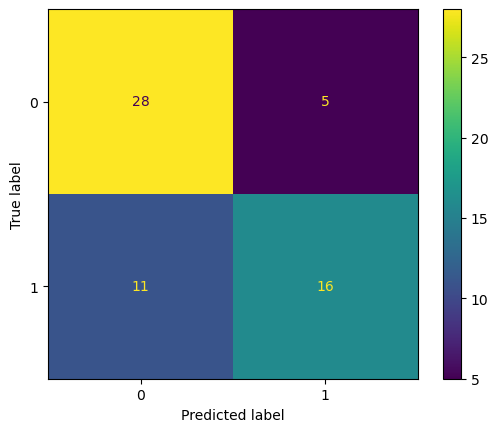

In [26]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd2 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_SuVeCrmd2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.86      0.89      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

Time to test: 0.0


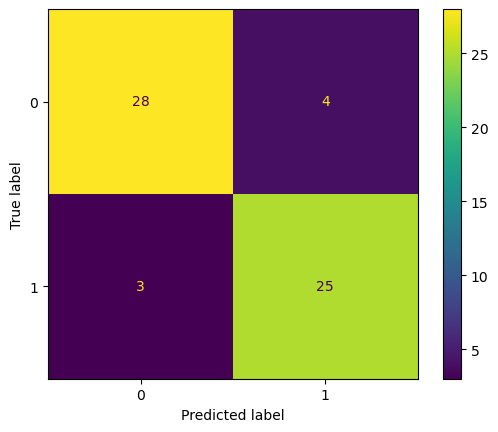

In [27]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_SuVeCrmd3 = Ht_De_Ptn_SuVeCrmd1.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_SuVeCrmd3)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)